In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score



In [421]:
df=pd.read_csv("Threats (1).csv")
print(df.head())

   Unnamed: 0     id       dur proto service state  spkts  dpkts  sbytes  \
0       40000  40001  0.012996   tcp       -   FIN     16     18    1540   
1       40001  40002  0.004119   tcp       -   FIN     12     12    1064   
2       40002  40003  0.000988   udp     dns   CON      2      2     146   
3       40003  40004  3.415787   tcp     ssh   FIN    230    238   24344   
4       40004  40005  0.193943   tcp       -   FIN     72     74    4238   

   dbytes  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0    1644  ...                 1               6             0           0   
1    2260  ...                 1               1             0           0   
2     178  ...                 1               2             0           0   
3   29556  ...                 1               1             0           0   
4   63618  ...                 1               5             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  

In [422]:
print(df.shape)

(135341, 46)


In [423]:
df.dtypes

Unnamed: 0             int64
id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm    

In [424]:
df['attack_cat'].unique()


array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [425]:
df['state'].unique()

array(['FIN', 'CON', 'INT', 'REQ', 'RST'], dtype=object)

In [426]:
df['proto'].unique()


array(['tcp', 'udp', 'arp', 'ospf', 'igmp', 'ddp', 'ipv6-frag', 'cftp',
       'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc', 'sat-mon', 'cphb',
       'sun-nd', 'iso-ip', 'xtp', 'il', 'unas', 'mfe-nsp', '3pc',
       'ipv6-route', 'idrp', 'bna', 'swipe', 'kryptolan', 'cpnx', 'rsvp',
       'wb-mon', 'vmtp', 'ib', 'dgp', 'eigrp', 'ax.25', 'gmtp', 'pnni',
       'sep', 'pgm', 'idpr-cmtp', 'zero', 'rvd', 'mobile', 'narp', 'fc',
       'pipe', 'ipcomp', 'ipv6-no', 'sat-expak', 'ipv6-opts', 'snp',
       'ipcv', 'br-sat-mon', 'ttp', 'tcf', 'nsfnet-igp', 'sprite-rpc',
       'aes-sp3-d', 'sccopmce', 'sctp', 'qnx', 'scps', 'etherip', 'aris',
       'pim', 'compaq-peer', 'vrrp', 'iatp', 'stp', 'l2tp', 'srp', 'sm',
       'isis', 'smp', 'fire', 'ptp', 'crtp', 'sps', 'merit-inp', 'idpr',
       'skip', 'any', 'larp', 'ipip', 'micp', 'encap', 'ifmp', 'tp++',
       'a/n', 'ipv6', 'i-nlsp', 'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp',
       'ddx', 'ippc', 'visa', 'secure-vmtp', 'uti', 'vines', 'crudp

In [427]:
df['service'].unique()

array(['-', 'dns', 'ssh', 'ftp-data', 'http', 'ftp', 'smtp', 'radius',
       'pop3', 'dhcp', 'ssl', 'snmp', 'irc'], dtype=object)

In [428]:
df_no_missing=df.loc[(df['service']!='-')]


In [429]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'id']  # Unique identifiers, not needed for classification
df_cleaned = df_no_missing.drop(columns=columns_to_drop)
print(df_cleaned.head())

        dur proto   service state  spkts  dpkts  sbytes  dbytes         rate  \
2  0.000988   udp       dns   CON      2      2     146     178  3036.437382   
3  3.415787   tcp       ssh   FIN    230    238   24344   29556   136.718127   
5  0.001082   udp       dns   CON      2      2     146     178  2772.643321   
6  0.003656   tcp  ftp-data   FIN      6      8     320    1946  3555.798785   
7  0.000970   udp       dns   CON      2      2     146     178  3092.783525   

   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
2    31  ...                 1               2             0           0   
3    31  ...                 1               1             0           0   
5    31  ...                 1               2             0           0   
6    31  ...                 1               4             0           0   
7    31  ...                 1               3             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  

In [430]:
df_cleaned.dropna()
print(df_cleaned.head())

        dur proto   service state  spkts  dpkts  sbytes  dbytes         rate  \
2  0.000988   udp       dns   CON      2      2     146     178  3036.437382   
3  3.415787   tcp       ssh   FIN    230    238   24344   29556   136.718127   
5  0.001082   udp       dns   CON      2      2     146     178  2772.643321   
6  0.003656   tcp  ftp-data   FIN      6      8     320    1946  3555.798785   
7  0.000970   udp       dns   CON      2      2     146     178  3092.783525   

   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
2    31  ...                 1               2             0           0   
3    31  ...                 1               1             0           0   
5    31  ...                 1               2             0           0   
6    31  ...                 1               4             0           0   
7    31  ...                 1               3             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  

In [431]:
print(df_cleaned.shape)

(63777, 44)


In [432]:
# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column].astype(str))
print(df_cleaned.shape)

(63777, 44)


In [433]:
print(df_cleaned.dtypes)

dur                  float64
proto                  int64
service                int64
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [434]:
x=df_cleaned.drop(['attack_cat'],axis=1).copy()
y=df_cleaned['attack_cat'].copy()
print(x.head())

        dur  proto  service  state  spkts  dpkts  sbytes  dbytes         rate  \
2  0.000988      1        1      0      2      2     146     178  3036.437382   
3  3.415787      0       10      1    230    238   24344   29556   136.718127   
5  0.001082      1        1      0      2      2     146     178  2772.643321   
6  0.003656      0        3      1      6      8     320    1946  3555.798785   
7  0.000970      1        1      0      2      2     146     178  3092.783525   

   sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
2    31  ...                 2                 1               2   
3    31  ...                 1                 1               1   
5    31  ...                 1                 1               2   
6    31  ...                 1                 1               4   
7    31  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
2             0           0    

In [435]:
print(x.shape)

(63777, 43)


In [436]:
y.unique()

array([6, 1, 4, 7, 3, 0, 2, 8, 5])

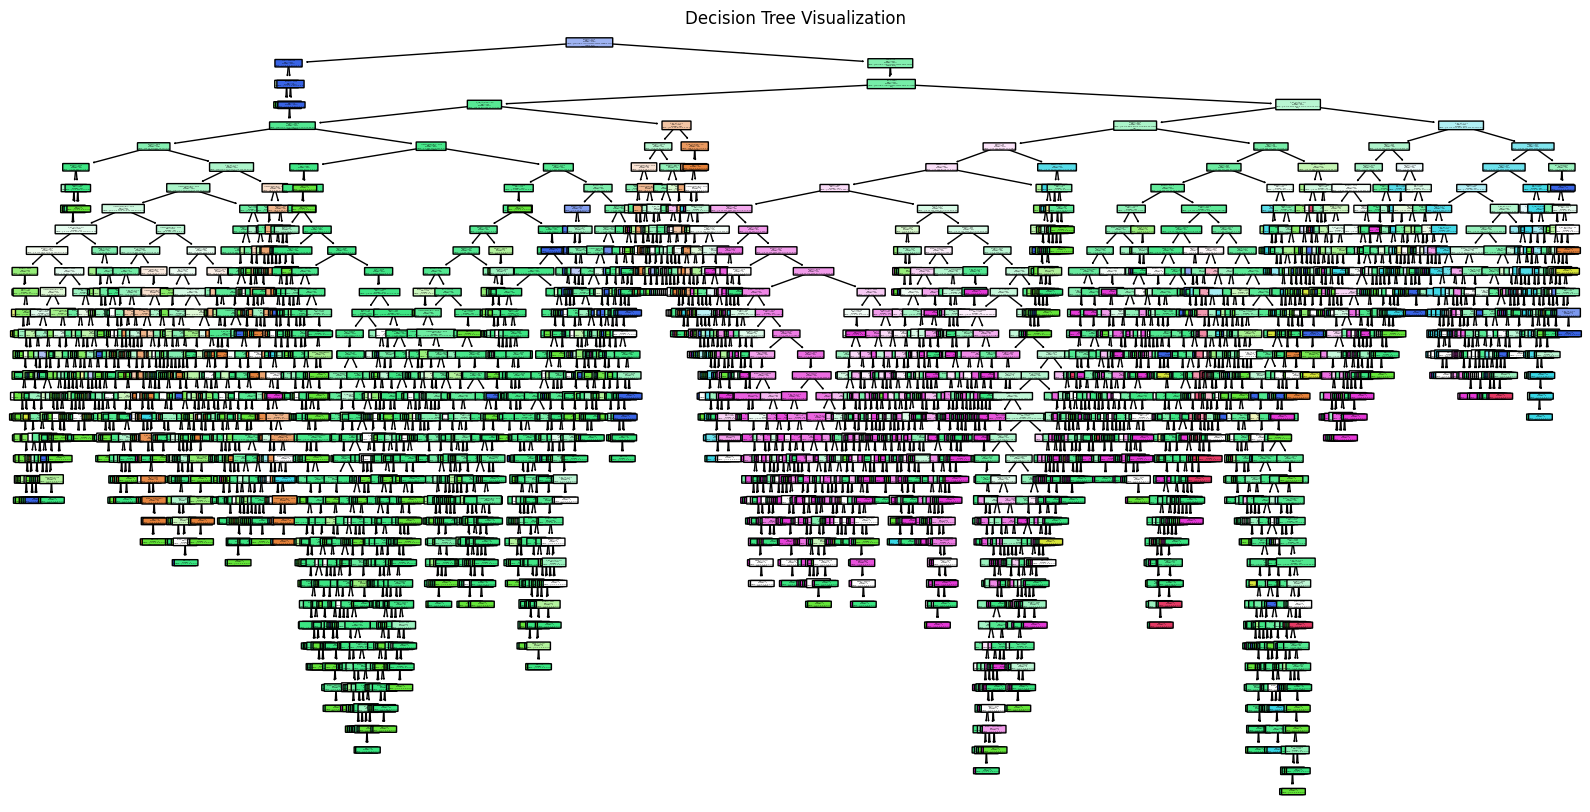

In [437]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Train a Decision Tree Classifier
df_dt = DecisionTreeClassifier(random_state=42)
df_dt.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    df_dt,
    filled=True,
    rounded=True,
    class_names=[
        'Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
        'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'
    ],
    feature_names=x.columns
)
plt.title("Decision Tree Visualization")
plt.show()

<Figure size 1200x1000 with 0 Axes>

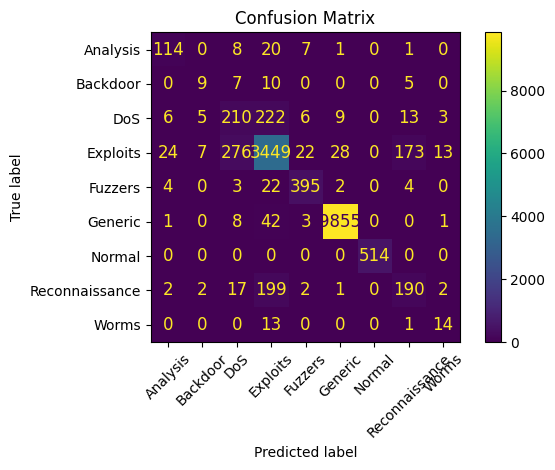

In [438]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Check unique values in y_test
unique_classes = np.unique(y_test)
class_labels = label_encoder.inverse_transform(unique_classes)

# Adjust figure size
plt.figure(figsize=(12, 10))  # Increase width and height

# Generate the confusion matrix display
ConfusionMatrixDisplay.from_estimator(
    df_dt,
    X_test,
    y_test,
    display_labels=class_labels,
    cmap='viridis',
    xticks_rotation=45,  # Rotate x-axis labels for better spacing
    colorbar=True,  # Add colorbar for better visual context
    im_kw={'interpolation': 'nearest'},  # Enhance image quality
    text_kw={'fontsize': 12}  # Adjust font size of displayed values
)

plt.title("Confusion Matrix")
plt.tight_layout()  # Ensure everything fits well
plt.show()


In [439]:
path=df_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas >= 0]  # Filter non-negative alphas

# Limit the number of alphas (reduce computation)
ccp_alphas = ccp_alphas[::max(1, len(ccp_alphas) // 100)]  # Sample 50 values
df_dts=[]
for ccp_alpha in ccp_alphas:
    df_dt= DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    df_dt.fit(X_train,y_train)
    df_dts.append(df_dt)

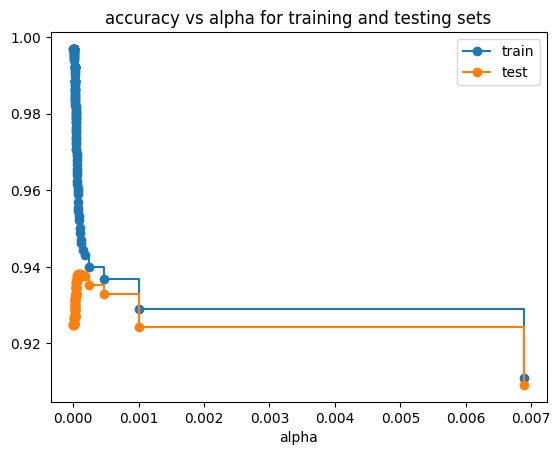

In [440]:
train_scores=[df_dt.score(X_train,y_train) for df_dt in df_dts]
test_scores=[df_dt.score(X_test, y_test) for df_dt in df_dts]
fig, ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()


<Axes: xlabel='tree'>

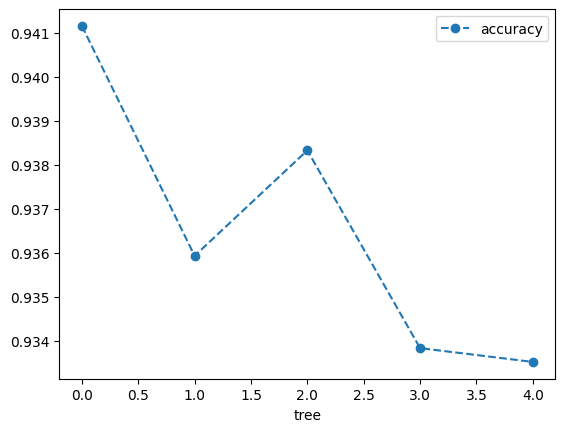

In [441]:
df_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.00040)
scores=cross_val_score(df_dt,X_train,y_train,cv=5)
df=pd.DataFrame(data={'tree': range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

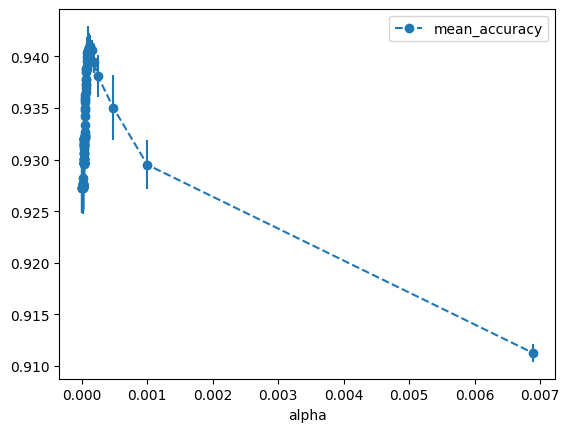

In [442]:
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    df_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(df_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')


In [454]:
alpha_filtered=alpha_results[(alpha_results['alpha']>0.0002) & (alpha_results['alpha']<0.0003)]
print(alpha_filtered)

       alpha  mean_accuracy       std
97  0.000244       0.938096  0.002024


In [456]:
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.0002) & (alpha_results['alpha']<0.0003)]['alpha']
print(ideal_ccp_alpha)


97    0.000244
Name: alpha, dtype: float64


In [445]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
print(ideal_ccp_alpha)


0.00024360570362486154


C:\Users\mahek\AppData\Local\Temp\ipykernel_21652\608364359.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha=float(ideal_ccp_alpha)


In [446]:
df_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
df_dt_pruned=df_dt_pruned.fit(X_train,y_train)

In [447]:
y_pred_pruned = df_dt_pruned.predict(X_test)
y_pred_proba_pruned = df_dt_pruned.predict_proba(X_test)
# Evaluation Metrics for Pruned Tree
f1_pruned = f1_score(y_test, y_pred_pruned, average="weighted")
recall_pruned = recall_score(y_test, y_pred_pruned, average="weighted")
mcc_pruned = matthews_corrcoef(y_test, y_pred_pruned)
auc_pruned = roc_auc_score(y_test, y_pred_proba_pruned, multi_class="ovr")

print("Optimal ccp_alpha:", ideal_ccp_alpha)
print("F1 Score (Pruned):", f1_pruned)
print("Recall Rate (Pruned):", recall_pruned)
print("MCC (Pruned):", mcc_pruned)
print("AUC (Pruned):", auc_pruned)
print("\nClassification Report (Pruned):\n", classification_report(y_test, y_pred_pruned))


Optimal ccp_alpha: 0.00024360570362486154
F1 Score (Pruned): 0.925845106961061
Recall Rate (Pruned): 0.935277516462841
MCC (Pruned): 0.8822390765073211
AUC (Pruned): 0.9719259697956915

Classification Report (Pruned):
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       151
           1       0.50      0.06      0.11        31
           2       0.60      0.13      0.21       474
           3       0.83      0.95      0.89      3992
           4       0.93      0.89      0.91       430
           5       1.00      0.99      1.00      9910
           6       1.00      1.00      1.00       514
           7       0.64      0.45      0.53       415
           8       0.43      0.64      0.51        28

    accuracy                           0.94     15945
   macro avg       0.74      0.65      0.65     15945
weighted avg       0.93      0.94      0.93     15945



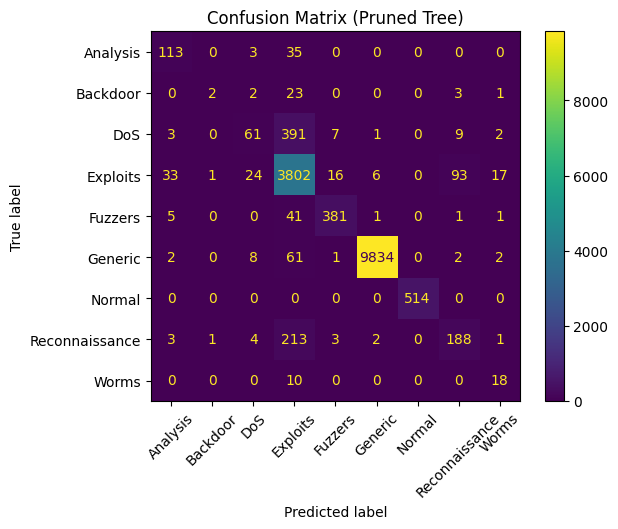

In [ ]:
# Confusion Matrix for Pruned Tree
unique_classes = np.unique(y_test)
class_labels = label_encoder.inverse_transform(unique_classes)

ConfusionMatrixDisplay.from_estimator(
    df_dt_pruned,
    X_test,
    y_test,
    display_labels=class_labels,
    cmap="viridis",
    xticks_rotation=45

plt.title("Confusion Matrix (Pruned Tree)")
plt.show()

)

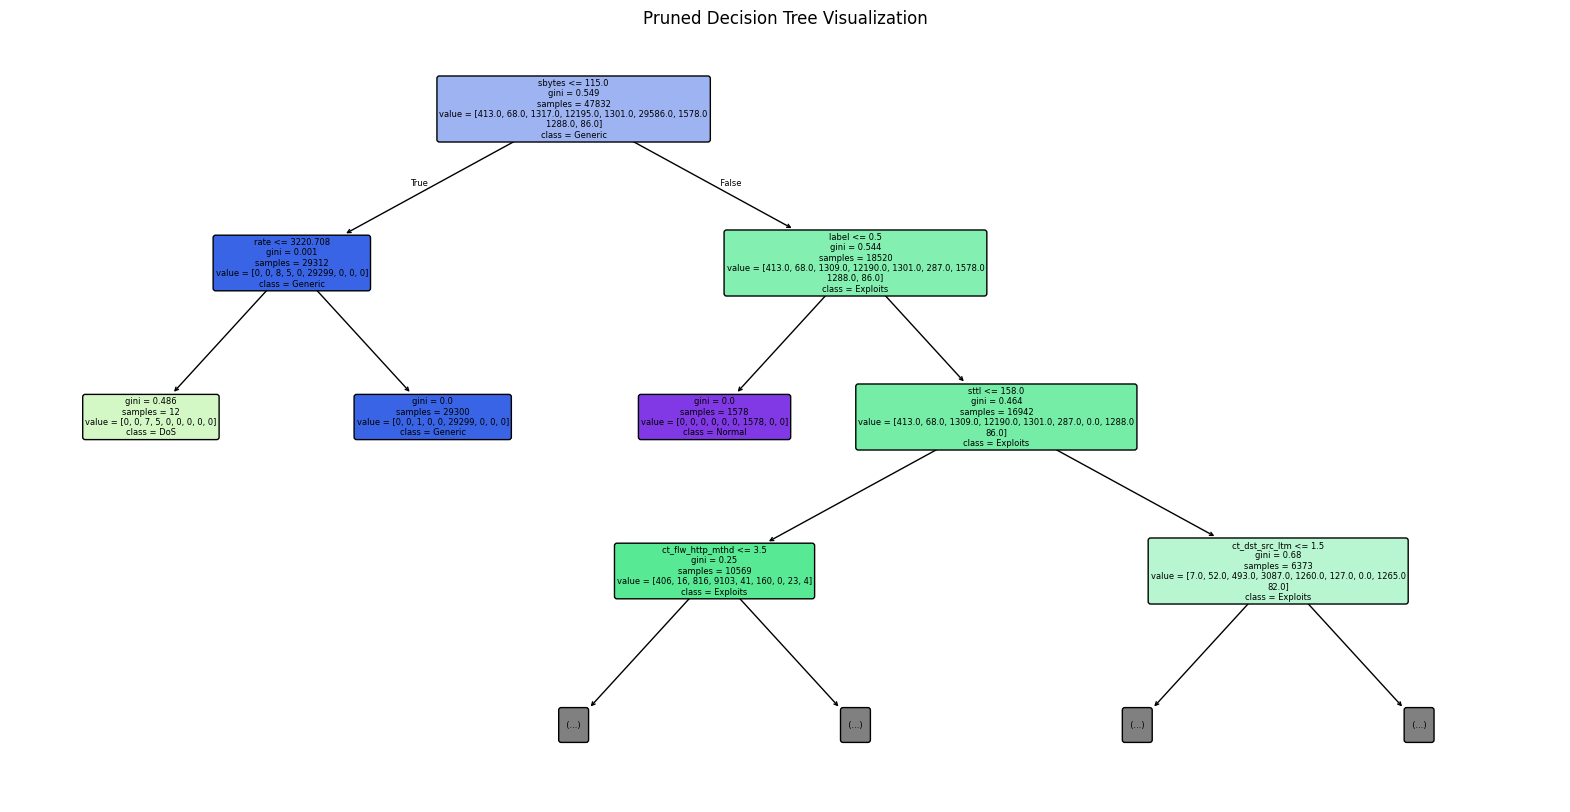

In [449]:
# Decision Tree Visualization for Pruned Tree
plt.figure(figsize=(20, 10))
plot_tree(
    df_dt_pruned,
    feature_names=x.columns,
    class_names=label_encoder.inverse_transform(range(len(np.unique(y)))),
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Pruned Decision Tree Visualization")
plt.show()